# Projeto: Prevendo a aderencia de Seguros de Viagem de acordo com o perfil de clientes.#

<p align="center">
  <img src="pexels-pascal-renet-1089306.jpg" >
</p>

Como é possível economizar dinheiro em marketing? Podemos planejar uma campanah de acordo com o público-alvo que queremos.
Como podemos achar o melhor público alvo? Ciência de dados.
A ciência de dados brilha nesse aspecto. Existem inúmeras ferramentas para examinar grandes bases de dados e determinar quais são os melhores perfis para se fazer uma campanha.
Aqui, vou tentar fazer uma Análise Exploratória e depois realizar uma ANACOR e Análise de Correlações Múltiplas.

Vamos começar com nossa Análise Exploratória

In [2]:
import pandas as pd
import csv
import collections, numpy

data = pd.read_csv('TravelInsurancePrediction.csv')

#data.describe()
#data.tail()
#print(data.list())
print(data['FamilyMembers'].unique())
print(data['FamilyMembers'].isnull().sum())
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

[6 7 4 3 8 9 5 2]
0


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Na nossa base temos:

- **Age**: A idade do cliente.
- **Employment Type**: Se a pessoa é servidor publico ou trabalha no setor privado (__Government Sector__ or __Private Sector/Self Employed__).
- **GraduateOrNot**: Se o cliente tem ensino superior.
- **AnnualIncome**: Qual a renda anual do cliente.
- **FamilyMembers**: Quantas pessoas vivem na mesma casa.
- **ChronicDiseases**: Se o cliente tem uma doença crônica (**1** for yes **0** for no).
- **FrequentFlyer**: Se o cliente é um viajante frequente. Uma definição não foi dada pela fonte dos dados.
- **EverTravelledAbroad**: Se um cliente já viajou para outro país além do seu próprio.
- **TravelInsurance**: Se o cliente contratou o seguro de viagens (**1** for yes **0** for no).

Tem 1987 linha de dados para trabalhar, vamos tirar o máximo deles!

Primeiro vamos ver a distribuição dos nossos clientes de acordo com cada variável.

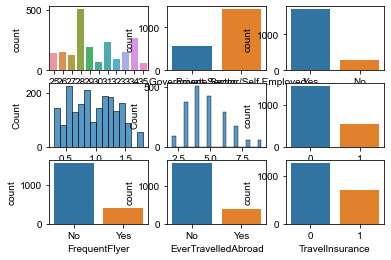

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.countplot(data = data, x = 'Age', ax=ax[0][0])
sns.countplot(x='Employment Type', data=data, ax=ax[0][1])
sns.countplot(data = data, x = 'GraduateOrNot', ax=ax[0][2])
sns.histplot(data = data, x = 'AnnualIncome', ax=ax[1][0])
sns.histplot(data = data, x = 'FamilyMembers', ax=ax[1][1])
sns.countplot(data = data, x = 'ChronicDiseases', ax=ax[1][2])
sns.countplot(data = data, x = 'FrequentFlyer', ax=ax[2][0])
sns.countplot(data = data, x = 'EverTravelledAbroad', ax=ax[2][1])
sns.countplot(data = data, x = 'TravelInsurance', ax=ax[2][2])

sns.set(rc={'figure.figsize':(40,30)})

Podemos ver aqui que a grande maioria dos viajantes tem 26 anos de um grupo que varia de 25 a 35 anos. Os dados podem ter sido adulterados porque isso é uma coincidência demais (uma diferença de dez anos no grupo). A maioria dos clientes é graduada, trabalha no setor privado, não são passageiros frequentes e nunca estiveram no exterior. A maioria dos clientes tem famílias de 3 a 5 pessoas. Talvez pessoas solteiras não possam comprar pacotes? Agora vamos dar uma olhada em nossas correlações! Lembre-se: não podemos calcular correlações com "Sim" ou "Não". Eles não têm valores numéricos, mesmo que os binarizemos (covnert sim ou não a 1s e 0s). É um erro muito grave fazer isso! Para calcular a correlação temos que calcular as médias. Não podemos calcular médias de "Sim" e "Não", da mesma forma que não podemos assumir que 'Bom' e 'Muito bom' podem ter valores numéricos. Estes são **Variáveis Categóricas** e não podem ser incluídas no calculo da correlação.

No bloco seguinte vamos cálcular somente as correlações de nossas variáveiss quantitativas.

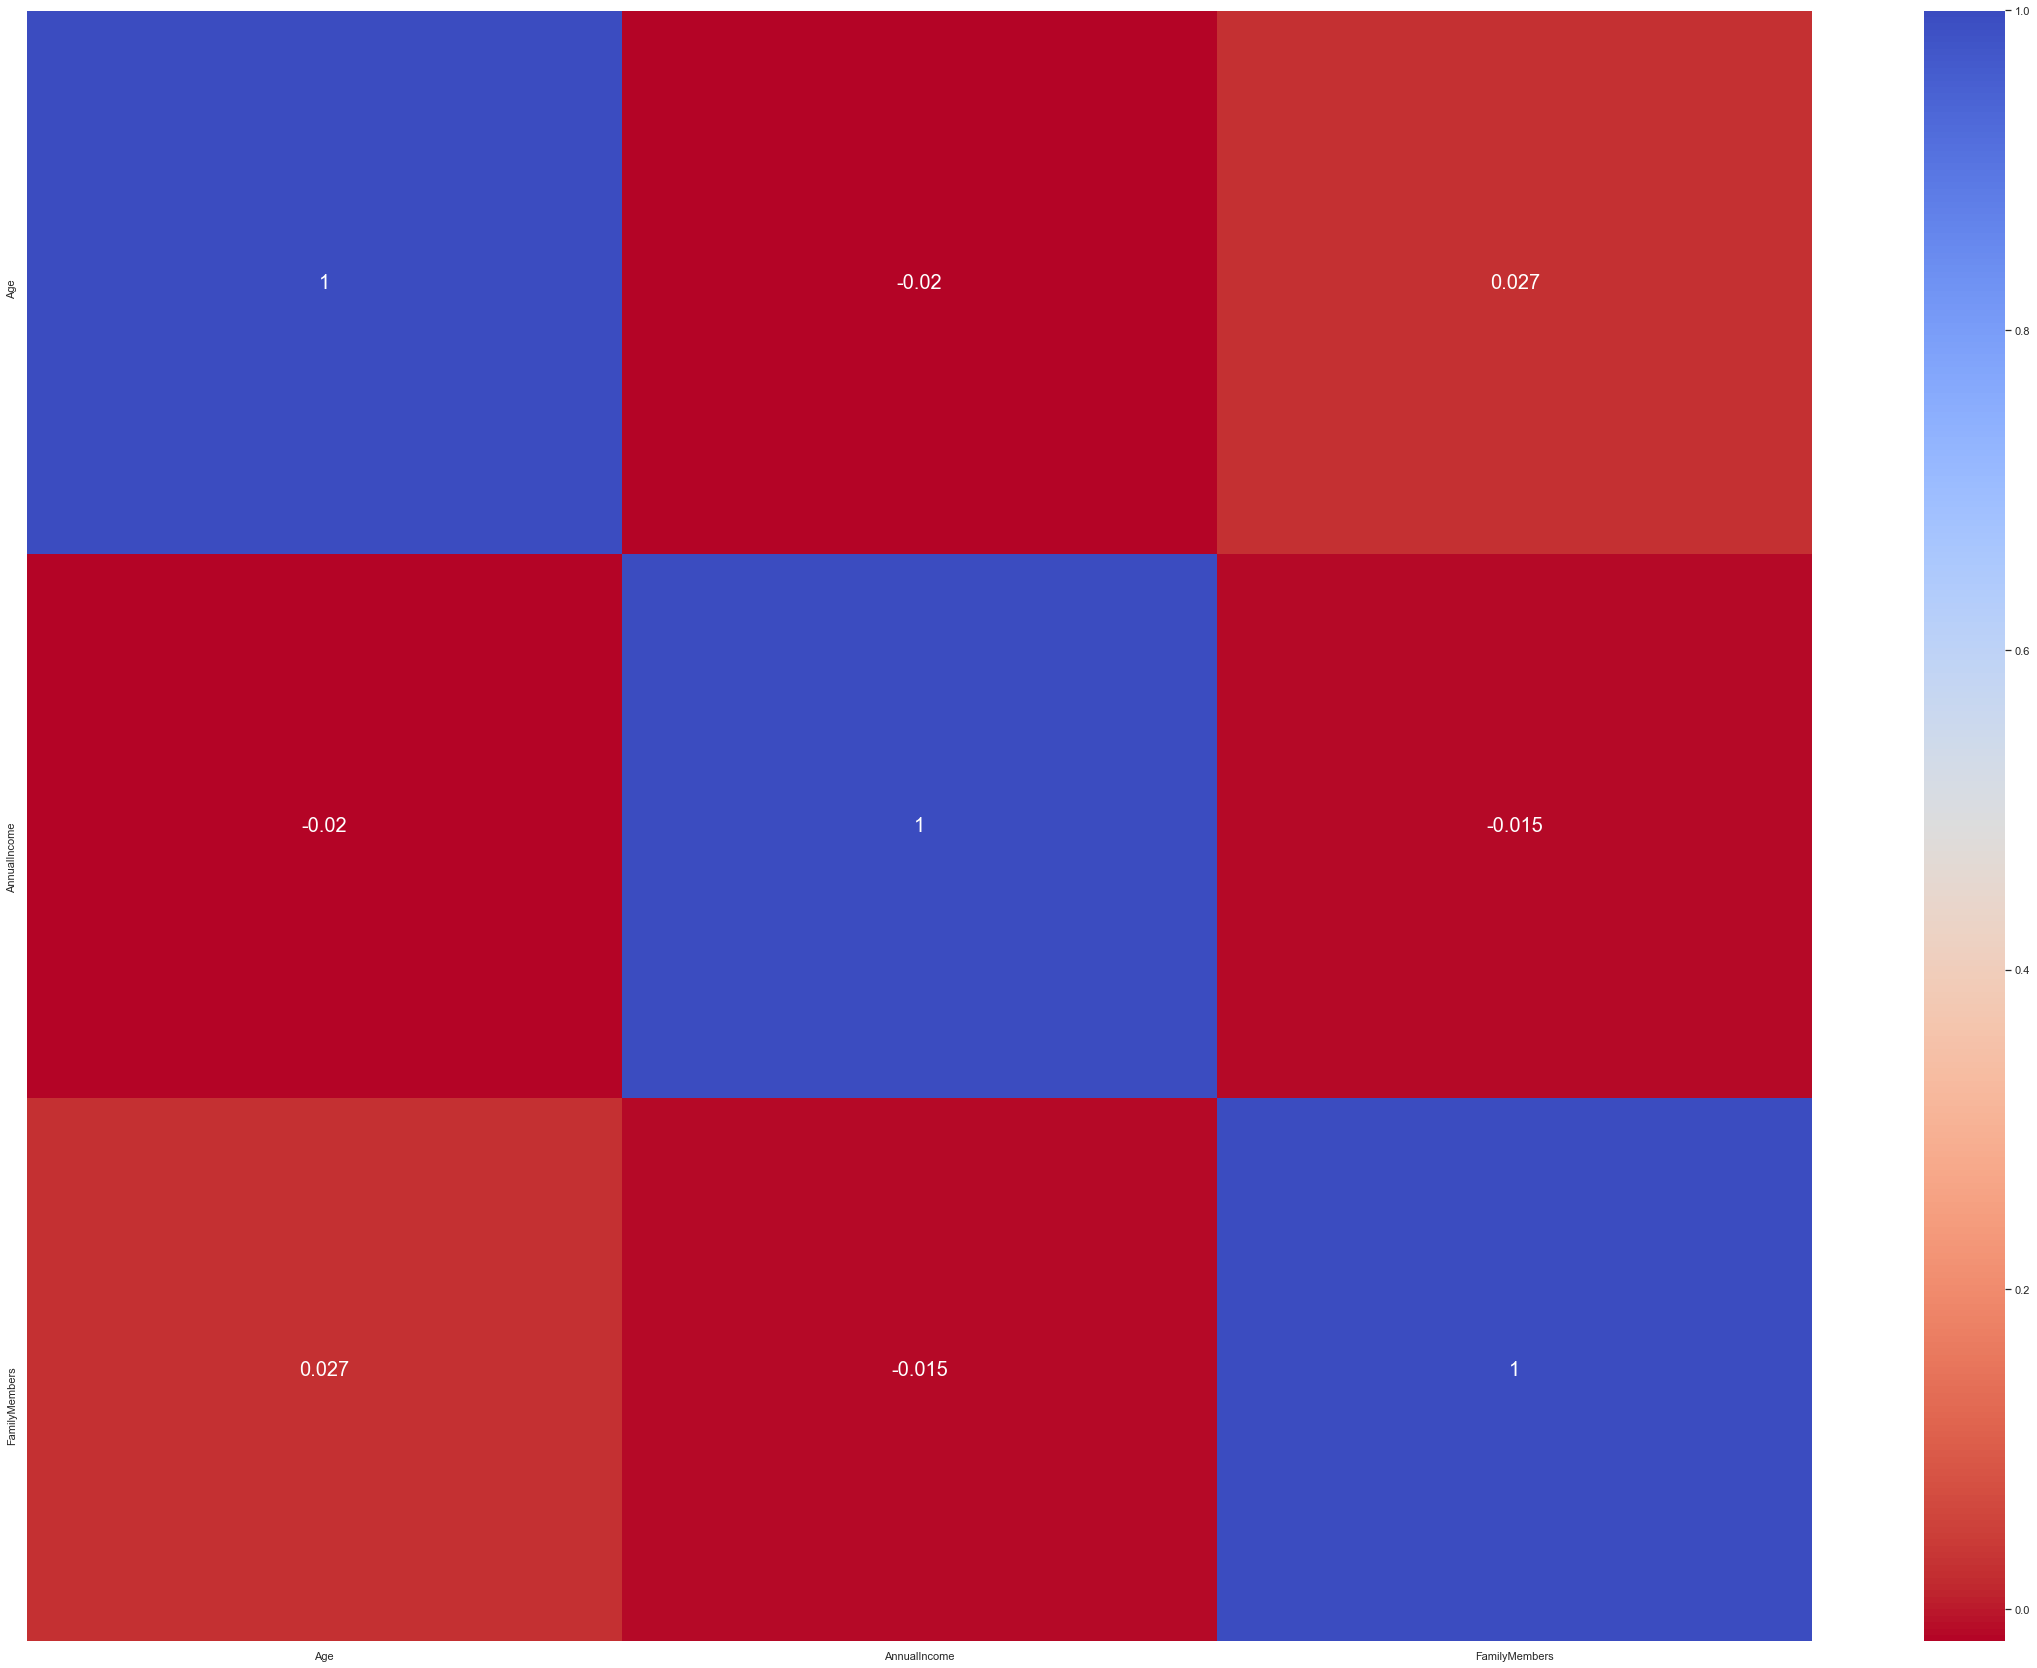

In [4]:
from sklearn.preprocessing import StandardScaler

#Selecting quantitative variables.
quantitatives = data.loc[ :,['Age','AnnualIncome','FamilyMembers']]

#Normalization of observations.
quantitatives_scaled = pd.DataFrame(StandardScaler().fit_transform(quantitatives))

#Naming columns again.
quantitatives_scaled.columns=['Age','AnnualIncome','FamilyMembers']

#Calculating correlations
data_correlation = quantitatives_scaled.corr()

#Plotting a heatmap
sns.heatmap(data_correlation, cmap='coolwarm_r', annot_kws={'size':20},annot=True)
sns.set(rc={"figure.figsize":(15, 10)})
plt.show()

Elas são fracamente correlacionadas, uma PCA está fora de questão.

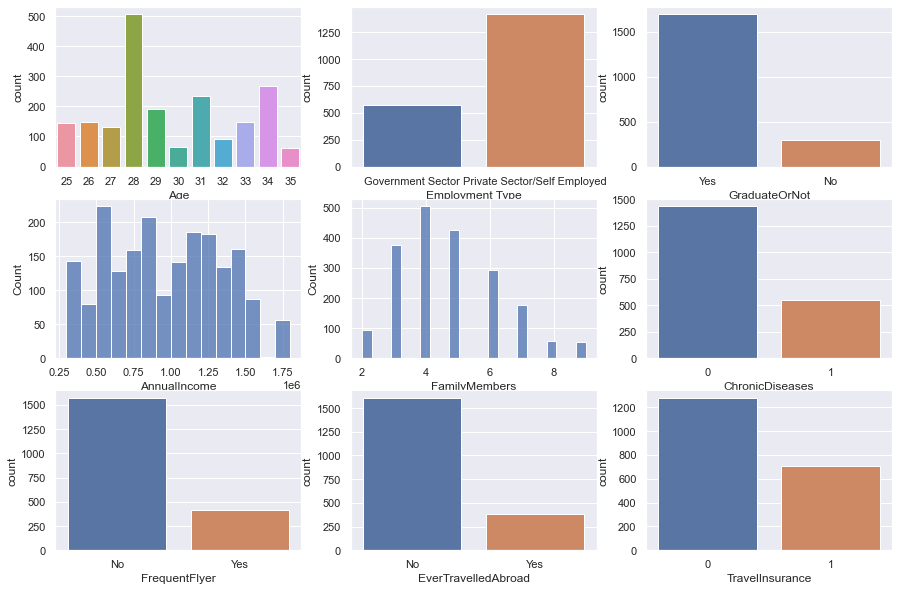

In [85]:
fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.countplot(data = data, x = 'Age', ax=ax[0][0])
sns.countplot(x='Employment Type', data=data, ax=ax[0][1])
sns.countplot(data = data, x = 'GraduateOrNot', ax=ax[0][2])
sns.histplot(data = data, x = 'AnnualIncome', ax=ax[1][0])
sns.histplot(data = data, x = 'FamilyMembers', ax=ax[1][1])
sns.countplot(data = data, x = 'ChronicDiseases', ax=ax[1][2])
sns.countplot(data = data, x = 'FrequentFlyer', ax=ax[2][0])
sns.countplot(data = data, x = 'EverTravelledAbroad', ax=ax[2][1])
sns.countplot(data = data, x = 'TravelInsurance', ax=ax[2][2])

sns.set(rc={'figure.figsize':(40,30)})

Vou tentar comparar as pessoas que contratam seguros com as outras variáveis que temos. 
Dessa forma, descobriremos qual grupo de pessoas está mais inclinado a comprar seguros. 
Talvez pessoas com famílias grandes comprem com mais frequência? Quem sabe?

<AxesSubplot:xlabel='EverTravelledAbroad', ylabel='TravelInsurance'>

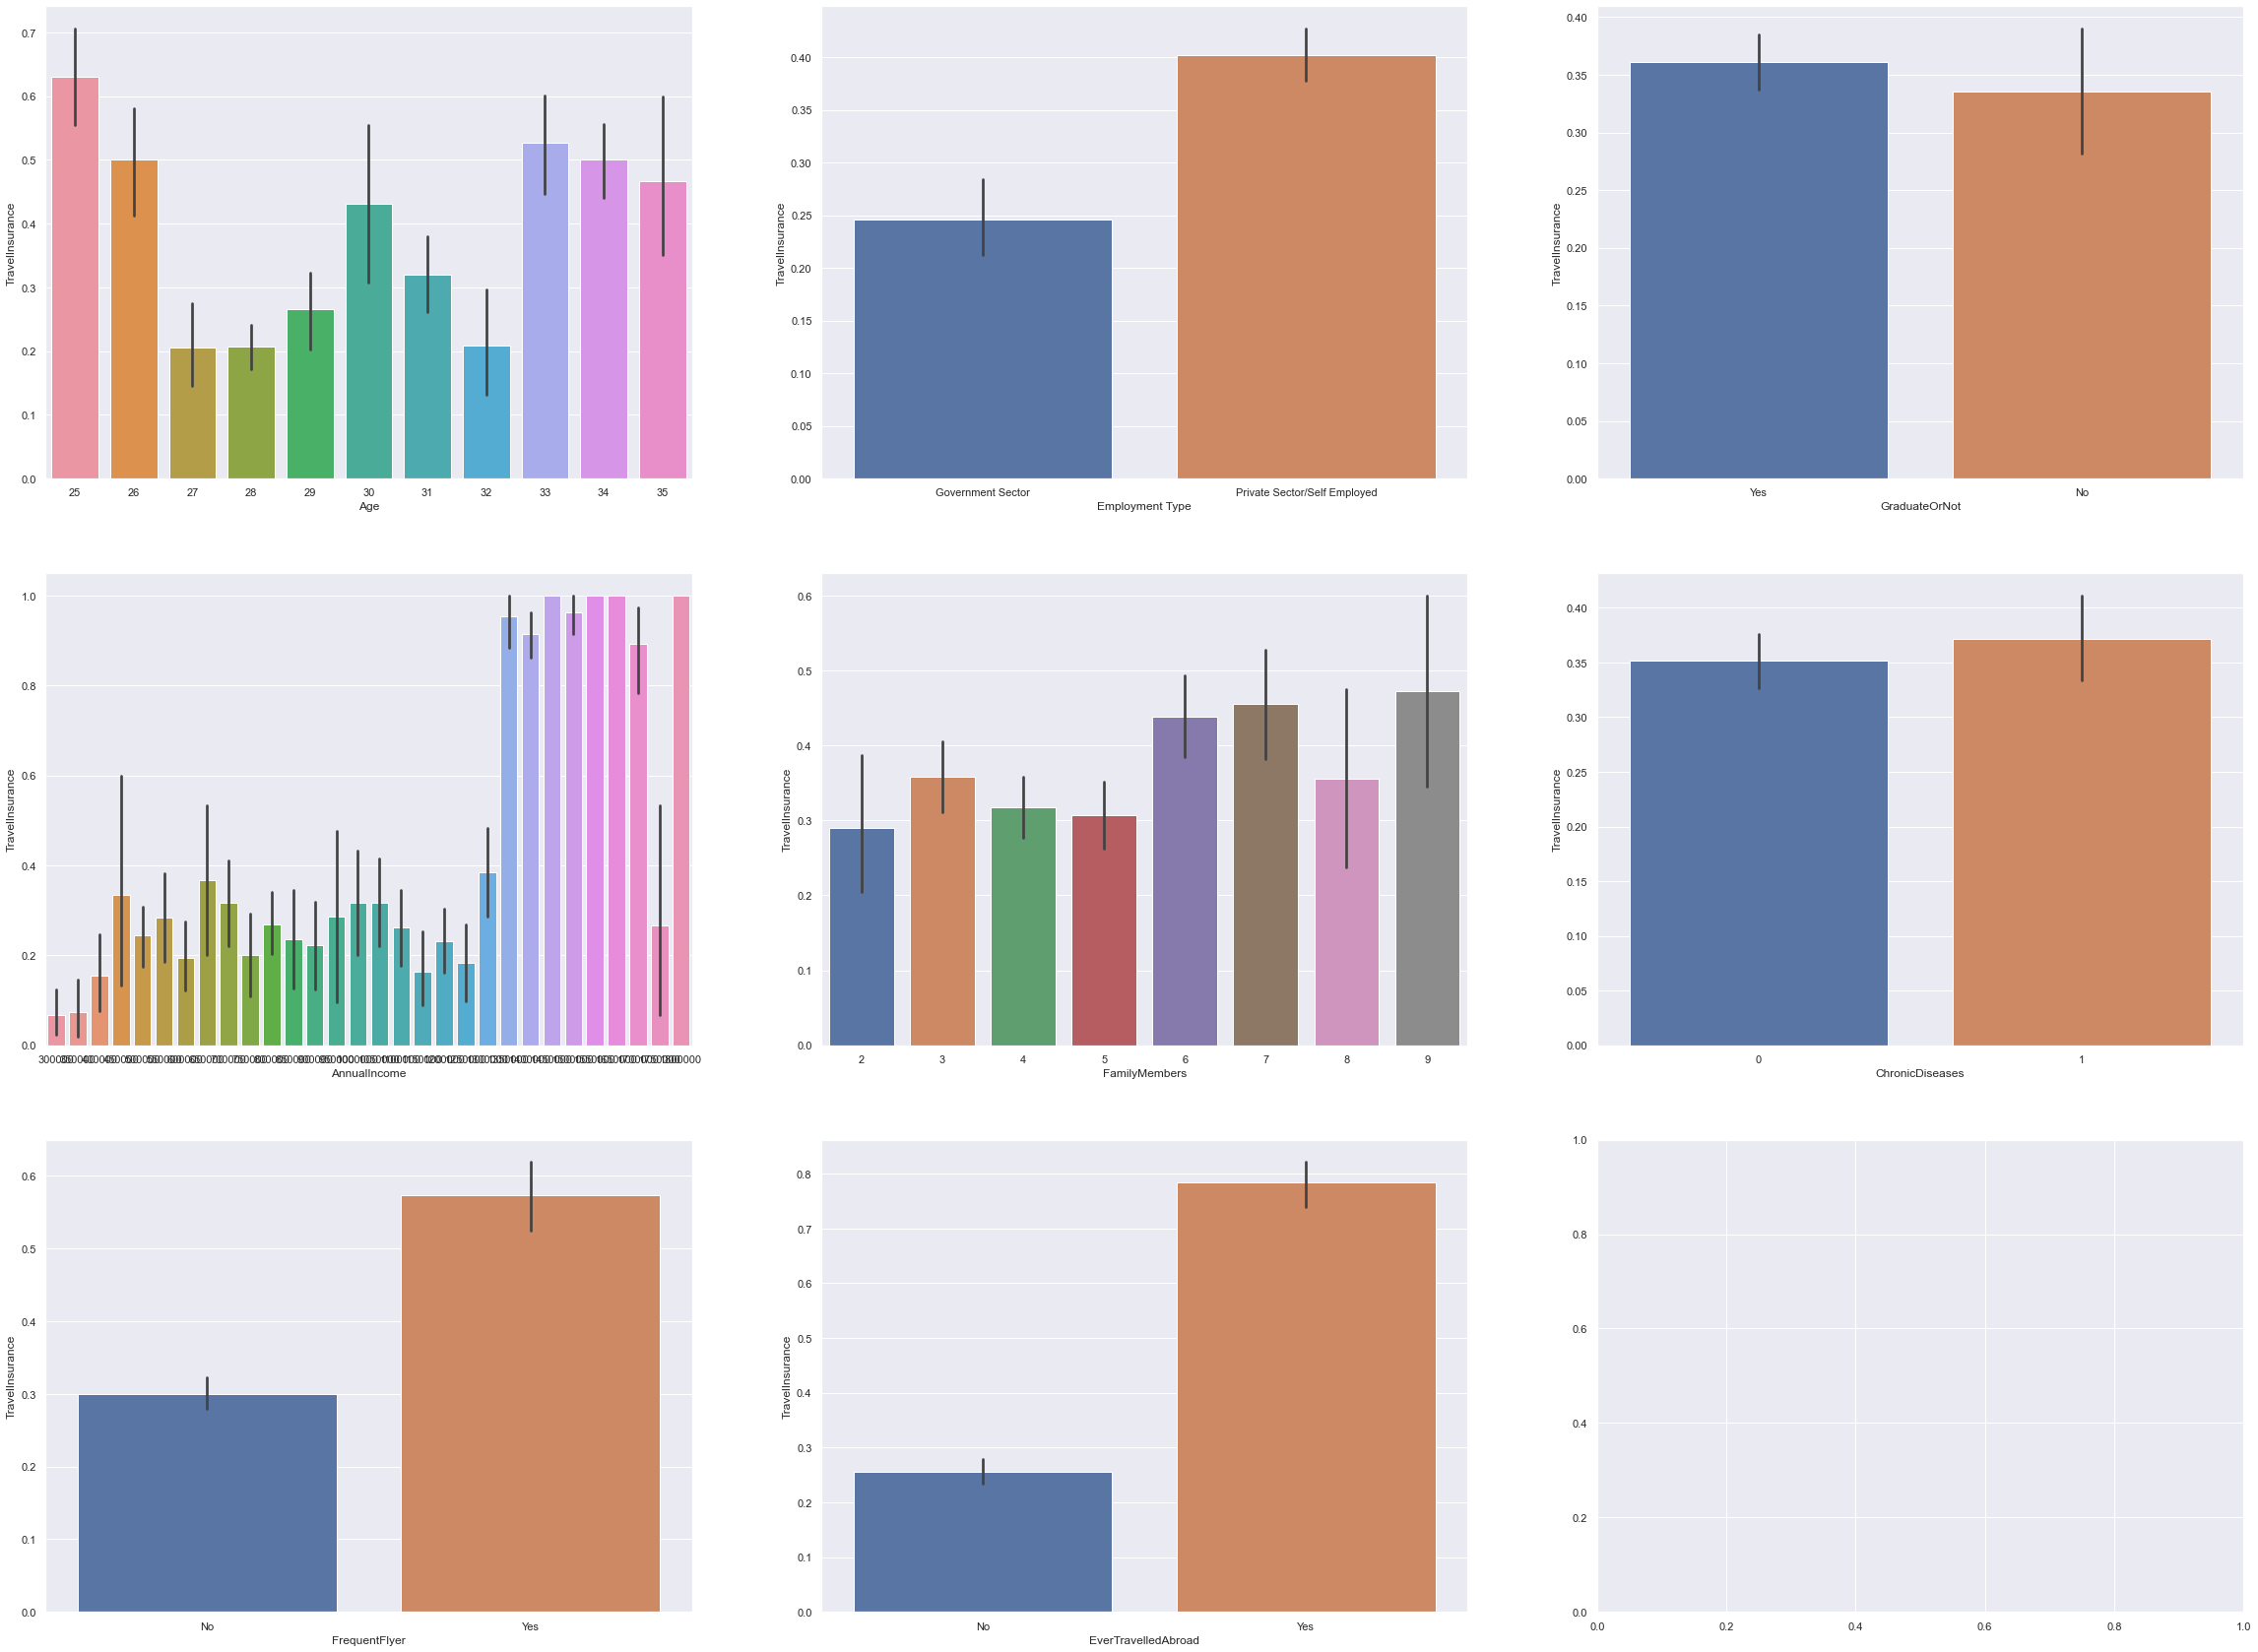

In [86]:
fig , ax = plt.subplots(nrows = 3, ncols = 3)

sns.barplot(x="Age",y="TravelInsurance",data=data,ax=ax[0][0])
sns.barplot(x="Employment Type",y="TravelInsurance",data=data,ax=ax[0][1])
sns.barplot(x="GraduateOrNot",y="TravelInsurance",data=data,ax=ax[0][2])
anual = sns.barplot(x="AnnualIncome",y="TravelInsurance",data=data,ax=ax[1][0])
sns.barplot(x="FamilyMembers",y="TravelInsurance",data=data,ax=ax[1][1])
sns.barplot(x="ChronicDiseases",y="TravelInsurance",data=data,ax=ax[1][2])
sns.barplot(x="FrequentFlyer",y="TravelInsurance",data=data,ax=ax[2][0])
sns.barplot(x="EverTravelledAbroad",y="TravelInsurance",data=data,ax=ax[2][1])

Ainda temos as variáveis categoricas para explorarmos.
Para ver a associação entre variáveis vamos usar a análise de correspondências múltiplas.

  EverTravelledAbroad FrequentFlyer  ChronicDiseases GraduateOrNot  \
0                  No            No                1           Yes   
1                  No            No                0           Yes   
2                  No            No                1           Yes   
3                  No            No                1           Yes   
4                  No           Yes                1           Yes   

                Employment Type  TravelInsurance  
0             Government Sector                0  
1  Private Sector/Self Employed                0  
2  Private Sector/Self Employed                1  
3  Private Sector/Self Employed                0  
4  Private Sector/Self Employed                0  
MCA()


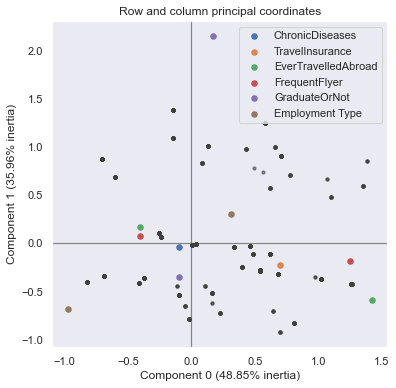

In [21]:
import pandas as pd 
import prince

quali = data.loc[ :,['EverTravelledAbroad','FrequentFlyer','ChronicDiseases','GraduateOrNot','Employment Type','TravelInsurance']]
print(quali.head())

mca = prince.MCA()

mca = mca.fit(quali)

print(mca)

ax = mca.plot_coordinates(
     X=quali,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

ax.get_figure().savefig('mca_coordinates.svg')

Lets get our data ready for a Machine Learning model.
As taught on the Kaggle Course, we can delete categorical variables for our model, make a Ordinal Encoding or One-Hot encoding.
In this case the adequate approach is to use One-Hot encoding, as 'Yes' or 'No' or 'Government Sector' and 'Private Sector/Self employed' can't be ranked.
First let's classify the proper variable as categorcal and them use the One-Hot method.
Lets get to work. 

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

data["Employment Type"] = data["Employment Type"].astype("category")
data["GraduateOrNot"] = data["GraduateOrNot"].astype("category")
data["ChronicDiseases"] = data['ChronicDiseases'].astype("category")
data["FrequentFlyer"] = data["FrequentFlyer"].astype("category")
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].astype("category")

#Defining our target
y = data.TravelInsurance

#Getting column names
features=data.columns.values.tolist()

#Removing our target variable from our feature list
features.remove('TravelInsurance')

#Defining our X!
X = data[features]


s = (X.dtypes == 'category')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(object_cols, axis=1)

#Scale the numerical variables
num_X = pd.DataFrame(StandardScaler().fit_transform(num_X))

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

OH_X


Categorical variables:
['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']


,0,1,2,0,1,2,3,4,5,6,7,8,9
0,0.463430,-1.414061,0.774964,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.463430,0.842012,1.396373,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.493446,-1.148641,-0.467855,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.566587,-0.617800,-1.089265,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.566587,-0.617800,2.017783,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1.150107,1.505563,-0.467855,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1983,-0.566587,2.169114,0.153554,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1984,-0.566587,0.576591,0.774964,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1985,1.493446,0.178461,0.774964,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Beautiful. Remembering that the beauty is in the eyes of the viewer.
Now let's split our data in test and training.

################################################  [ TRAINNING DATA RESULTS]  ################################################
Classifiers:  LogisticRegression Has a training score of 77.0 % accuracy score


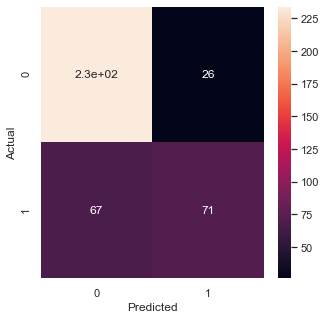

Classifiers:  DecisionTreeClassifier Has a training score of 77.0 % accuracy score


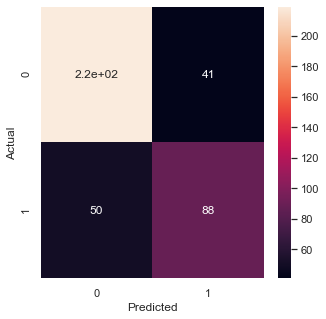

Classifiers:  RandomForestClassifier Has a training score of 79.0 % accuracy score


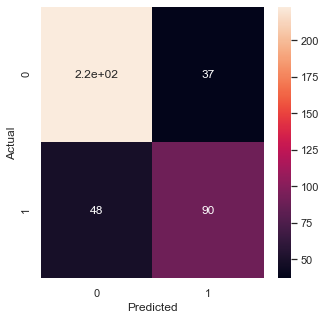


 

################################################  [ TESTING DATA RESULTS ]  ################################################
Classifiers:  LogisticRegression Has a test score of 79.0 % accuracy score


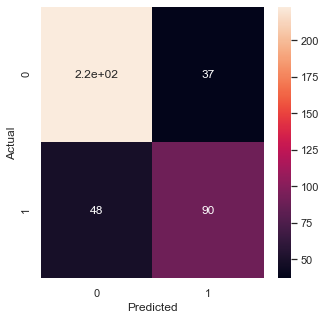

Classifiers:  DecisionTreeClassifier Has a test score of 69.0 % accuracy score


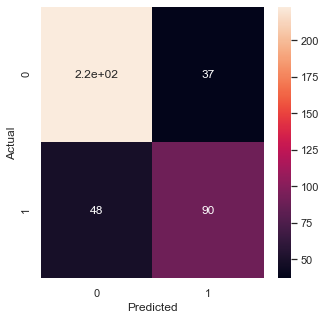

Classifiers:  RandomForestClassifier Has a test score of 76.0 % accuracy score


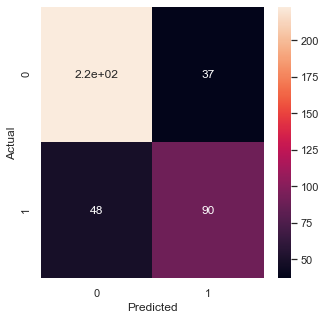

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Let's split train and test data
sns.set(rc={"figure.figsize":(5, 5)})
X_train, X_test, y_train, y_test = train_test_split(OH_X, y, test_size=0.2, random_state=0)

#The models we are going to use:
classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=200),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

print ("################################################  [ TRAINNING DATA RESULTS]  ################################################")
#Running our models on training data and plotting a confusion matrix
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

    y_predicted = classifier.predict(X_test)
    confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True)
    plt.show()

print('\n \n')
print ("################################################  [ TESTING DATA RESULTS ]  ################################################")
#Running our models on test data and plotting a confusion matrix.
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a test score of", round(training_score.mean(), 2) * 100, "% accuracy score")


    sns.heatmap(confusion_matrix, annot=True)
    plt.show()


As we can see we couldn't get very accurate results...
Logistic Regression performed better with the Test Data.
48 False negatives and 37 False Positives in all methods

I'm out of ideas on how to improve the results...
If you have a sugestion please tell me!